In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
##load the data
df = pd.read_csv("CSVFile_2019-01-23T18_06_44.csv")
df.head()

,TXD_Date,CounterName,MemberID,Age,Sex,ClassName_1,ClassName_2,ProductName,Quantity,AmountPortion
0,20180518,成都锦江区群光百货安娜苏彩妆专柜,0.0,0.0,NaN,安娜苏,彩妆,安娜苏星幻闪彩霜300 7.5g,1.0,188.35
1,20180518,南京江宁区同曦假日百货红地球彩妆,0.0,0.0,NaN,红地球,护肤,嫣妮花蜜养颜啫喱 U01 50ml,1.0,205.86
2,20180516,成都高新区乐天百货香水临时专柜,0.0,0.0,NaN,物料,样品,浪凡花韵香水小样板 2ml,0.0,0.00
3,20180516,广州市海珠区乐峰广场B1-K02香水,0.0,0.0,NaN,物料,样品,浪凡花韵香水小样板 2ml,0.0,0.00
4,20180516,北京大兴区王府井综合香水,0.0,0.0,NaN,普拉达,香水,普拉达花花小姐女士淡香水 80ml,1.0,1020.00


In [3]:
##clean the data:choose the data which className_2 = '香水'
##df[df['MemberID'].isin([0])] 切片器运用

df = df[df['ClassName_2'].isin(['香水'])]
df = df[df['AmountPortion'] >0]
df.head()

,TXD_Date,CounterName,MemberID,Age,Sex,ClassName_1,ClassName_2,ProductName,Quantity,AmountPortion
4,20180516,北京大兴区王府井综合香水,0.0,0.0,NaN,普拉达,香水,普拉达花花小姐女士淡香水 80ml,1.0,1020.0
5,20180516,沈阳浑南新区兴隆大奥莱综合香水,0.0,0.0,NaN,万宝龙,香水,万宝龙荣耀之星男士淡香水 40ml,1.0,380.0
6,20180518,重庆南岸区百盛南坪综合香水,0.0,0.0,NaN,博柏利,香水,博柏利动感节拍女士淡香氛 30ml,1.0,480.0
7,20180518,广州白云区广百新市店香水,0.0,0.0,NaN,博柏利,香水,博柏利动感节拍女士淡香氛 30ml,1.0,384.0
8,20180520,昆明五华区王府井综合香水,0.0,0.0,NaN,宝格丽,香水,宝格丽夜幽男士香氛 50ml,1.0,525.0


In [4]:
##describe the data
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263871 entries, 4 to 920664
Data columns (total 10 columns):
TXD_Date         263871 non-null int64
CounterName      263871 non-null object
MemberID         263866 non-null float64
Age              263866 non-null float64
Sex              73750 non-null object
ClassName_1      263871 non-null object
ClassName_2      263871 non-null object
ProductName      263871 non-null object
Quantity         263871 non-null float64
AmountPortion    263871 non-null float64
dtypes: float64(4), int64(1), object(5)
memory usage: 22.1+ MB


In [5]:
##判定数据总数
df.Age.count()

263866

In [6]:
##判定总金额
sum(df.AmountPortion)

194889381.67999798

In [7]:
df.Age[~df['MemberID'].isin([0])].count()
##会员购买数据为73755条，占比

73750

In [8]:
## 会员购买总金额
sum(df.AmountPortion[~df['MemberID'].isin([0])])

50756913.97000038

In [9]:
##占比
a=df.Age[~df['MemberID'].isin([0])].count()/df.Age.count()
b=sum(df.AmountPortion[~df['MemberID'].isin([0])])/sum(df.AmountPortion)
print(a,b)

0.27949792697808734 0.2604396069835225


In [10]:
df_member = df[~df['MemberID'].isin([0])]
df_member.describe()

,TXD_Date,MemberID,Age,Quantity,AmountPortion
count,7.375500e+04,7.375000e+04,73750.000000,73755.000000,73755.000000
mean,2.018060e+07,1.337725e+06,45.009125,1.095316,688.182686
std,3.616471e+02,6.535020e+05,37.737531,0.852856,562.543402
min,2.018010e+07,2.100000e+01,0.000000,1.000000,11.000000
25%,2.018030e+07,1.589534e+06,21.000000,1.000000,455.575000
50%,2.018052e+07,1.652858e+06,29.000000,1.000000,627.950000
75%,2.018093e+07,1.674669e+06,43.000000,1.000000,810.000000
max,2.018123e+07,1.903938e+06,119.000000,80.000000,45580.000000


In [11]:
##用户购买次数平均
df_member.MemberID.value_counts().mean()

2.3652982681205903

In [12]:
##客单价
df_member.AmountPortion.mean()

688.1826855128518

In [175]:
df_bar = df_member.Age.replace([0,1,2,3,4,5,6,7,8,9,10],' 10')
df_bar = df_bar.replace([10,11,12,13,14,15,16,17,18,19],'10~19')
df_bar = df_bar.replace([20,21,22,23,24,25],'20~25')
df_bar = df_bar.replace([26,27,28,29,30],'26~30')
df_bar = df_bar.replace([31,32,33,34,35],'31~35')
df_bar = df_bar.replace([36,37,38,39,40],'36~40')
df_bar = df_bar.replace([40,41,42,43,44,45,46,47,48,49,50],'40~50')
df_bar = df_bar.replace([51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,73,75,76,78,81],'50')
df_bar = df_bar.replace(119,'Unknow')
df_bar = df_bar.value_counts()

df_bar = df_bar.sort_index()


<BarContainer object of 9 artists>

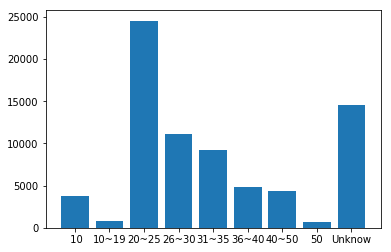

In [176]:
labels   = df_bar.index.tolist()
 
quants   = df_bar.values.tolist()
plt.bar(labels,quants)

([<matplotlib.patches.Wedge at 0x181bd6d8eb8>,
 [Text(-1.15843,-0.313114,'female'), Text(1.11016,0.300068,'male')],
 [Text(-0.675751,-0.18265,'80.6%'), Text(0.627483,0.169604,'19.4%')])

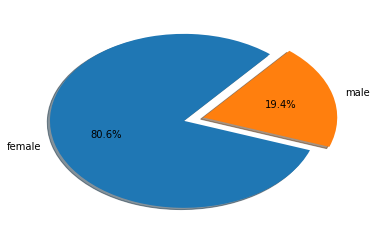

In [40]:
df_pie = df_member.Sex.value_counts()
labels=['female','male']
explode=0.1,0.05
plt.pie(df_pie,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=50)

In [88]:
df_pie2 = df_member.ClassName_1.value_counts()
df_pie2

([<matplotlib.patches.Wedge at 0x181bde0bf60>,
 [Text(-0.0556862,1.09859,'BVLGARI'),
  Text(-1.0686,0.260928,'versace'),
  Text(-0.805949,-0.748629,'Burberry'),
  Text(-0.0693455,-1.09781,'Anna Sui'),
  Text(0.548275,-0.953622,'Prada'),
  Text(0.971847,-0.515281,'Hermès'),
  Text(1.09985,0.0180616,'lanvin'),
  Text(0.990107,0.479258,'COACH'),
  Text(0.792168,0.763197,'Others ')],
 [Text(-0.0303743,0.599231,'23.8%'),
  Text(-0.582875,0.142324,'16.9%'),
  Text(-0.439609,-0.408343,'14.5%'),
  Text(-0.0378248,-0.598807,'9.6%'),
  Text(0.299059,-0.520157,'9.0%'),
  Text(0.530098,-0.281062,'8.9%'),
  Text(0.599919,0.00985176,'7.1%'),
  Text(0.540058,0.261414,'6.7%'),
  Text(0.432092,0.416289,'3.4%')])

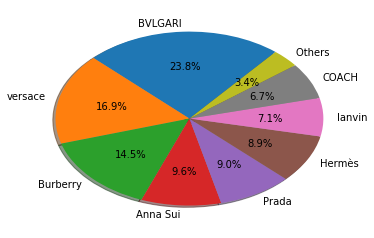

In [113]:
##为了更好地观测，进行数据清洗，将数量较少的品牌统一为others
df_pie2 = df_member.ClassName_1.replace("万宝龙","others").replace("华伦天奴","others").replace("盖璞","others").replace("丽娜蕙姿","others").replace("梵克雅宝","others").replace("登喜路","others").replace("都彭","others").replace("吉米周","others").replace("ETERNAL","others").replace("杜鲁萨迪","others").replace("巴尔曼","others").replace("雾仙浓","others").replace("杜嘉班纳","others").replace("博斯","others").replace("卡地亚","others").replace("罗伯特卡沃利","others").replace("莱俪","others").replace("卡罗琳娜","others")
df_pie2 =df_pie2.value_counts()
labels = ['BVLGARI' ,'versace','Burberry','Anna Sui','Prada','Hermès','lanvin' ,'COACH','Others ']
plt.pie(df_pie2,labels=labels,autopct='%1.1f%%',shadow=True,startangle=50)

In [46]:
col_n = ['ProductName','Quantity','AmountPortion']
a = pd.DataFrame(df_member,columns = col_n)
a1=a.groupby(['ProductName']).sum()
a1 = pd.DataFrame(a1)
a1.sort_values(by = ['AmountPortion','Quantity'],ascending= False)

,Quantity,AmountPortion
ProductName,,
宝格丽碧蓝男士淡香水套装（淡香水100ml+洗,1616.0,1219620.82
安娜苏筑梦天马淡香水 50ml,1544.0,776229.25
浪凡光韵女士浓香水 100ml,910.0,649006.95
范思哲晶钻女士香水 90ml,989.0,638132.30
宝格丽晶莹女士淡香水套装（淡香水40ml+身,1072.0,623703.28
宝格丽玫香金漾女士香水 90ml,515.0,618384.30
普拉达淑女香水 100ml,449.0,599314.12
宝格丽醉美兰香女士香水 100ml,474.0,580811.41
范思哲晶钻女士香水 30ml,1864.0,580111.07
